<a href="https://colab.research.google.com/github/0ginny/TIL/blob/main/240411_Face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision Masterclass - Face recognition

## Intuisition

### LBPH

- 행렬의 중앙값보다 크면 1, 작으면 0 으로 해서 binary 코드를 만들어
- 이렇게 하면 밝기와 무관하게 동일한 코드를 얻을 수 있어.

- 예를 들어 이미지를 구간으로 나누고 그 구간의 픽셀의 값을 어떤 값이 ㅁ많은지 히스토그램으로 표시할 수 있어.
- 이를 통해 히스토그램으로 어디가 가장자리이며 중앙인지 구분할 수 있어.

## OpenCV

### Loading the dataset

- Yale faces database: http://vision.ucsd.edu/content/yale-face-database

In [1]:
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/Colab Notebooks/Vision_AZ

/content/gdrive/MyDrive/Colab Notebooks/Vision_AZ


In [3]:
# import zipfile
# path = './Datasets/yalefaces.zip'
# zip_object = zipfile.ZipFile(file = path, mode = 'r')
# zip_object.extractall('./')
# zip_object.close()

### Pre-processing the images

In [4]:
import os

In [5]:
# train 이미지 나열
print(os.listdir('./yalefaces/train'))

['subject08.wink.gif', 'subject09.wink.gif', 'subject02.glasses.gif', 'subject15.happy.gif', 'subject06.noglasses.gif', 'subject11.noglasses.gif', 'subject03.sad.gif', 'subject05.normal.gif', 'subject14.leftlight.gif', 'subject15.noglasses.gif', 'subject02.noglasses.gif', 'subject06.rightlight.gif', 'subject13.rightlight.gif', 'subject06.centerlight.gif', 'subject10.leftlight.gif', 'subject09.centerlight.gif', 'subject02.wink.gif', 'subject03.wink.gif', 'subject11.sleepy.gif', 'subject14.rightlight.gif', 'subject01.rightlight.gif', 'subject08.sleepy.gif', 'subject14.sleepy.gif', 'subject12.glasses.gif', 'subject13.happy.gif', 'subject11.normal.gif', 'subject02.sad.gif', 'subject12.sad.gif', 'subject15.wink.gif', 'subject14.wink.gif', 'subject08.surprised.gif', 'subject12.noglasses.gif', 'subject05.noglasses.gif', 'subject07.glasses.gif', 'subject07.rightlight.gif', 'subject01.noglasses.gif', 'subject13.leftlight.gif', 'subject10.rightlight.gif', 'subject05.rightlight.gif', 'subject06.s

In [13]:
# 해당 이미지 모두 불러오기
def get_image_data():
    # 모든 train 이미지 주소 리스트
    paths = [os.path.join('./yalefaces/train',f) for f in os.listdir('./yalefaces/train')]
    # print(paths)
    faces = []
    ids = [] # subject id

    for path in paths:
        image = Image.open(path).convert('L') # L(Luminens) 모드 이미지 : 흑백이미지
        # opencv에 연결하기 위해 배열로 변환해야해.
        image_np = np.array(image,'uint8') # 픽셀을 정수형으로 전환

        # get id
        id = int(os.path.split(path)[1].split('.')[0].replace('subject',''))

        ids.append(id)
        faces.append(image_np)
    return np.array(ids), faces

In [15]:
ids, faces = get_image_data()

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 246, 221, 213],
       [255, 255, 255, ..., 248, 215, 201],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)
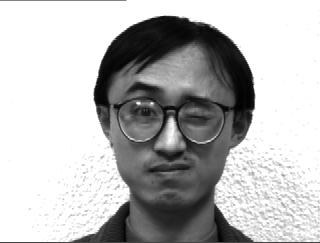

In [16]:
faces[0]

### Training the LBPH classifier

In [65]:
# 기본 파라미터 = 8, 8*8 구역으로 나눌 거임. 즉, 64 히스토그램이 있음.
# lbph_classifier = cv2.face.LBPHFaceRecognizer_create()

""" 기본 파라미터
threshold : 1.79.....
radius :  1
neighbors : 9
grid_x = 8
grid_y = 8
"""


# 파라미터 변경
lbph_classifier = cv2.face.LBPHFaceRecognizer_create( radius = 3 ,
                                                     neighbors = 12,
                                                      grid_x = 8, grid_y = 8)

lbph_classifier.train(faces,ids)
lbph_classifier.write('lbph_classifier2.yml') # yml 파일로 저장

### Recognizing faces

In [66]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('lbph_classifier2.yml')

In [67]:
test_image = './yalefaces/test/subject10.sad.gif'

In [68]:
# image preprocessing
image = Image.open(test_image).convert('L')
image_np = np.array(image, 'uint8')
image_np.shape

(243, 320)

In [56]:
prediction = lbph_face_classifier.predict(image_np)
prediction

(10, 6.384336446373091)

In [57]:
expected_output = int(os.path.split(test_image)[1].split('.')[0].replace('subject',''))
expected_output

10

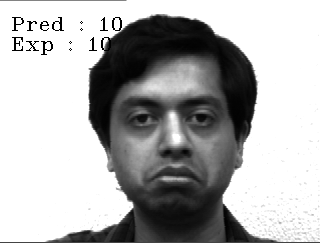

In [58]:
cv2.putText(image_np, # 글씨를 작성할 이미지
            f'Pred : {prediction[0]}', # 작성할 글씨
            (10,30), # 작성 위치
            cv2.FONT_HERSHEY_COMPLEX_SMALL,  # 폰트
            1, # fontScale
            (0, 255, 0)) # fontColor
cv2.putText(image_np, text = f'Exp : {expected_output}', org = (10,50),
            fontFace = cv2.FONT_HERSHEY_COMPLEX_SMALL,
            fontScale = 1, color = (0, 255, 0))
cv2_imshow(image_np)

### Evaluating the face classifier

In [69]:
paths = [os.path.join('./yalefaces/test',f) for f in os.listdir('./yalefaces/test')]
predictions = []
expected_outputs = []
for path in paths:
    image = Image.open(path).convert('L')
    image_np = np.array(image, 'uint8')

    prediction, _ = lbph_face_classifier.predict(image_np)
    expected_output = int(os.path.split(path)[1].split('.')[0].replace('subject',''))

    predictions.append(prediction)
    expected_outputs.append(expected_output)

predictions = np.array(predictions)
expected_outputs = np.array(expected_outputs)

In [60]:
len(expected_outputs)

30

In [61]:
import pandas as pd

In [ ]:
pd.DataFrame(np.concatenate([expected_outputs.reshape(-1,1),predictions.reshape(-1,1)], axis = 1))

In [62]:
# accuracy check
from sklearn.metrics import accuracy_score

In [71]:
accuracy_score(expected_outputs, predictions)

0.6333333333333333

In [38]:
len(predictions)

30

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn

<Axes: >

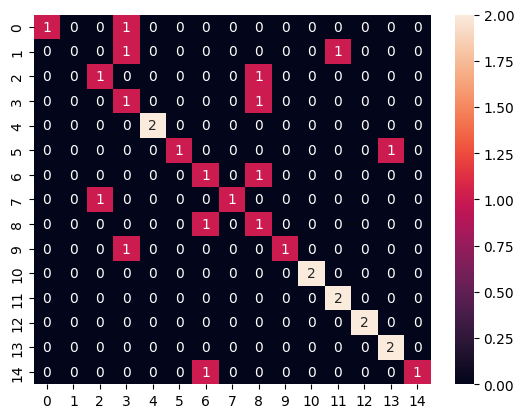

In [70]:
seaborn.heatmap(confusion_matrix(expected_outputs,predictions), annot = True)

### LBPH Parameters

- radius
- Neighbos
- grid_x and grid_y
    - nmber of group cells
- Threshold (신뢰도?)

## Dlib

In [72]:
import dlib

### Detecting facial points

In [73]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor('./Weights/shape_predictor_68_face_landmarks.dat')
# 얼굴을 인식하는 68개의 포인트를 찾아.

In [77]:
face_detections

rectangles[[(429, 38) (465, 74)], [(665, 90) (701, 126)], [(717, 103) (760, 146)], [(909, 70) (952, 113)], [(828, 98) (871, 142)], [(605, 70) (641, 106)], [(777, 62) (813, 98)], [(485, 78) (521, 114)], [(386, 60) (429, 103)], [(170, 41) (213, 84)], [(93, 89) (136, 132)], [(237, 50) (280, 94)], [(323, 50) (367, 94)], [(544, 65) (588, 108)]]

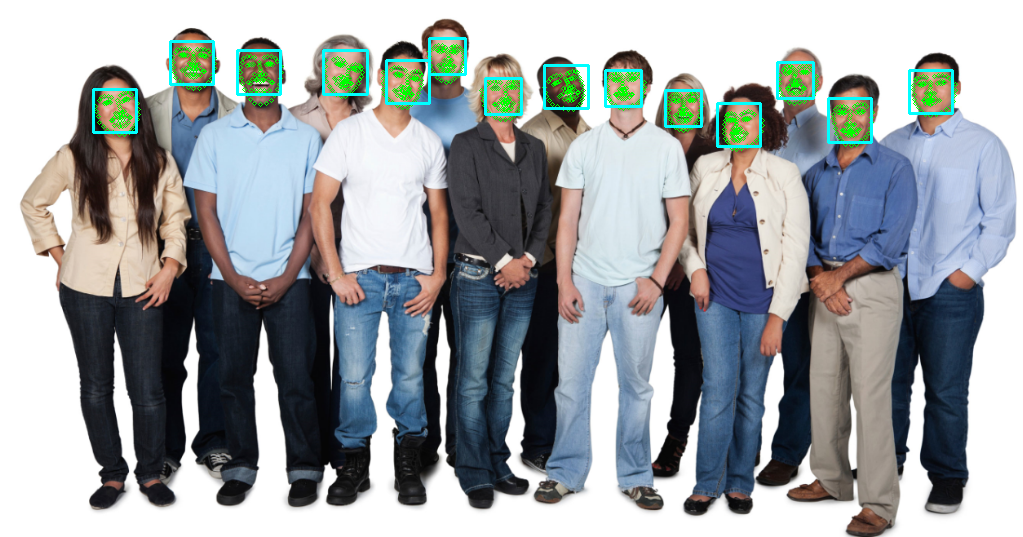

In [80]:
image = cv2.imread('./Images/people2.jpg')
face_detections = face_detector(image, 1)

for face in face_detections:
    points = points_detector(image, face)

    for point in points.parts():
        cv2.circle(image, (point.x, point.y ), 2, (0,255,0), 1)
    # print(points.parts())
    # print(len(points.parts()))


    l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(image, (l,t), (r,b), (255,255,0),2)
cv2_imshow(image)

### Detecting facial descriptors

In [81]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor('./Weights/shape_predictor_68_face_landmarks.dat')
face_descriptor_extractor = dlib.face_recognition_model_v1('./Weights/dlib_face_recognition_resnet_model_v1.dat')

RuntimeError: Error while calling cudaGetDevice(&the_device_id) in file /tmp/pip-install-k4h0wzdn/dlib_1acbd9ca351844359edb12fafa7ef339/dlib/cuda/gpu_data.cpp:204. code: 35, reason: CUDA driver version is insufficient for CUDA runtime version

### Calculating the distance between faces

### Detecting faces with Dlib

## Homework